# **Body Weight Classification**

import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import  classification_report,  accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

Load Dataset

In [ ]:
df=pd.read_csv('body_fat_new.csv')
df.head()


,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Category
0,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,Lean
1,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,Lean
2,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,Fat
3,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,Lean
4,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,Fat


In [ ]:
df_copy = df.copy()   #Creating a copy of csv file

In [ ]:
df_copy.shape

(252, 15)

In [ ]:
df_copy.info()   ##Checking Datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Density   252 non-null    float64
 1   Age       252 non-null    int64  
 2   Weight    252 non-null    float64
 3   Height    252 non-null    float64
 4   Neck      252 non-null    float64
 5   Chest     252 non-null    float64
 6   Abdomen   252 non-null    float64
 7   Hip       252 non-null    float64
 8   Thigh     252 non-null    float64
 9   Knee      252 non-null    float64
 10  Ankle     252 non-null    float64
 11  Biceps    252 non-null    float64
 12  Forearm   252 non-null    float64
 13  Wrist     252 non-null    float64
 14  Category  252 non-null    object 
dtypes: float64(13), int64(1), object(1)
memory usage: 29.7+ KB


In [ ]:
# Column names
print(df.columns.tolist())


['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist', 'Category']


In [ ]:
##To check the mathmatical values of the dataset
df_copy.describe()


,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


**# #Data Quality Check**

In [ ]:
#Finding missing/nulll value in data
df_copy.isnull().sum()

,0
Density,0
Age,0
Weight,0
Height,0
Neck,0
Chest,0
Abdomen,0
Hip,0
Thigh,0
Knee,0


In [ ]:
#Duplicated data check
print(df_copy.duplicated().sum())

0


In [ ]:
# Replace this with actual target name
target_column ='Category'
numeric_columns = df_copy.select_dtypes(include=['int64', 'float64']).columns


Text(0, 0.5, 'Count')

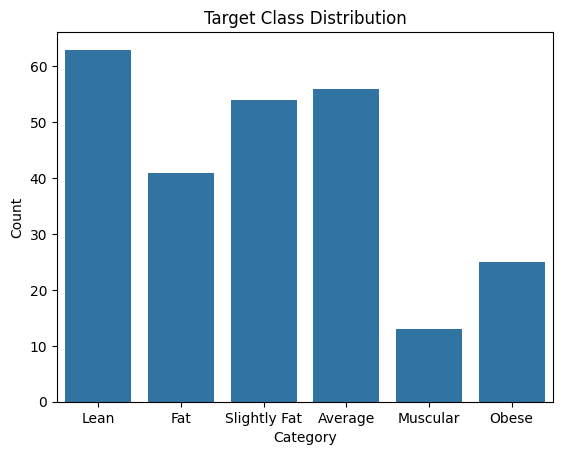

In [ ]:
# Distribution of target
sns.countplot(x=df[target_column])
plt.title('Target Class Distribution')
plt.xlabel('Category')
plt.ylabel('Count')

# Correlation Matrix

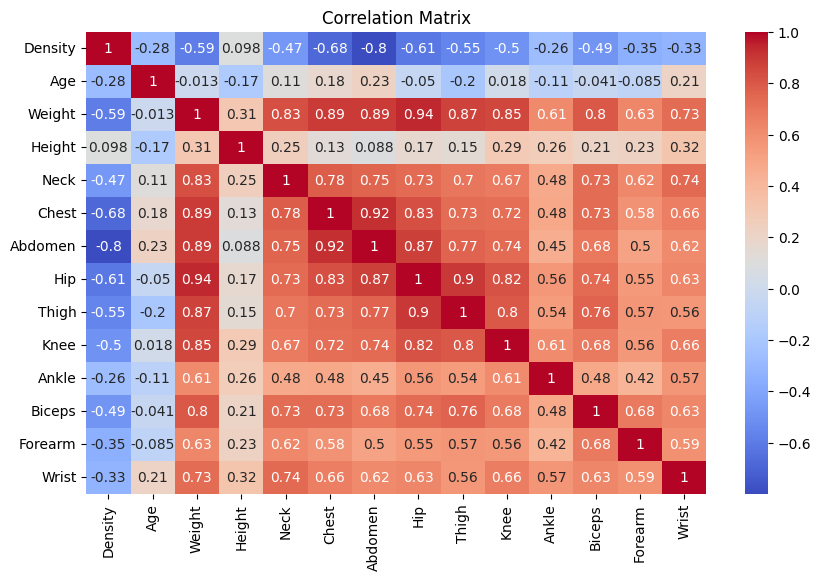

In [ ]:
#correlation matrix of data
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


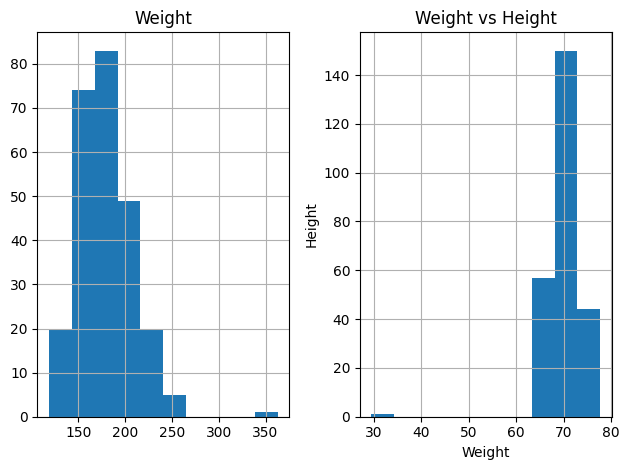

In [ ]:
# Showing relationship between height and weight in  histplot
df_copy.hist(column=['Weight','Height'])
plt.title('Weight vs Height')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

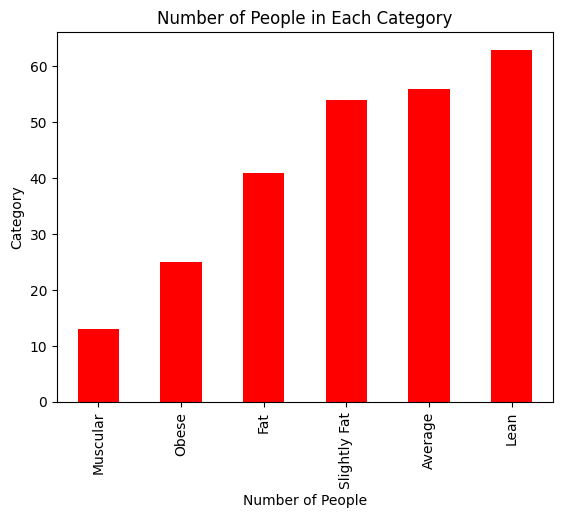

In [ ]:
#Grouping the number of people in each category among 252 people
df_copy.groupby('Category').size().sort_values(ascending=True).plot(kind='bar', color=('red'))
plt.title('Number of People in Each Category')
plt.xlabel('Number of People')
plt.ylabel('Category')
plt.show()

# Outliers

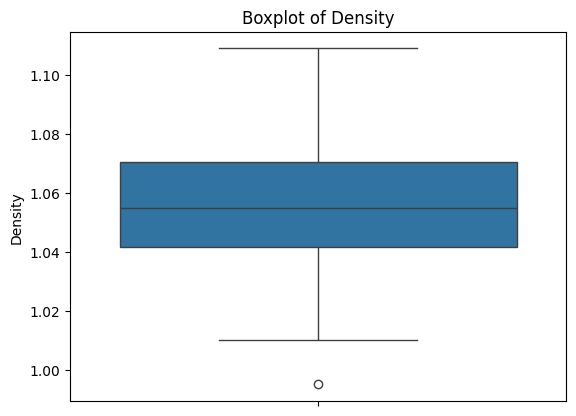

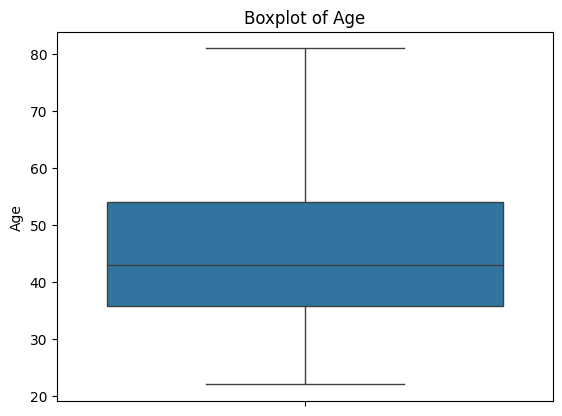

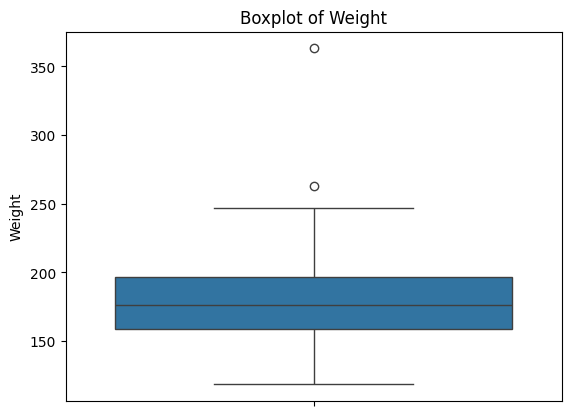

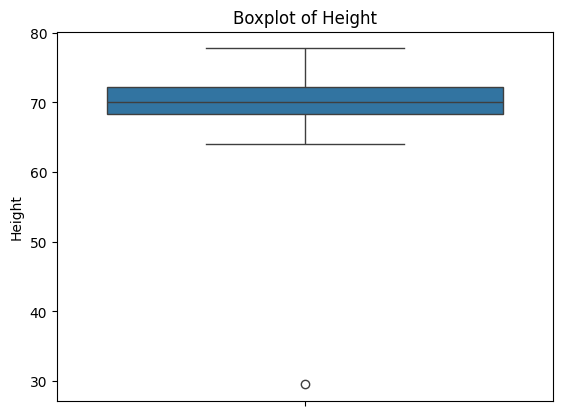

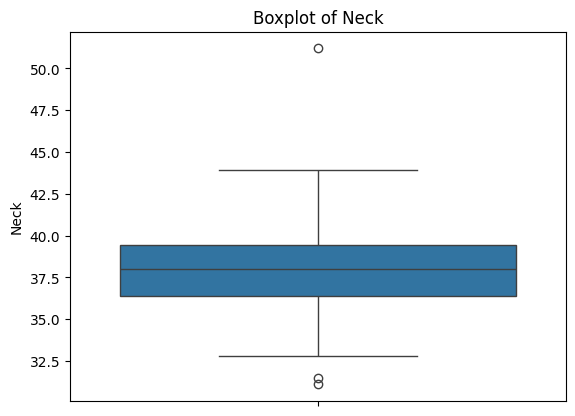

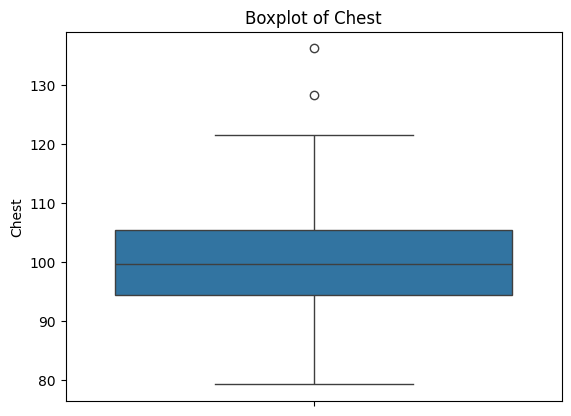

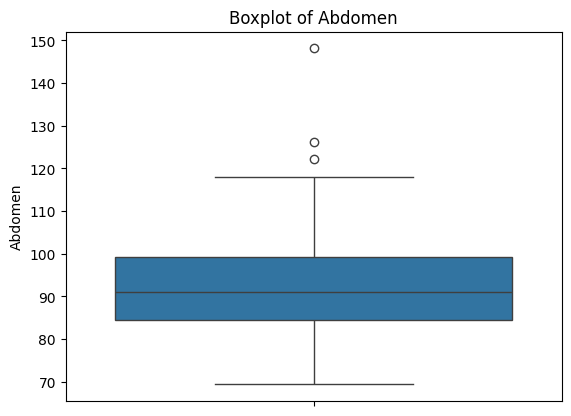

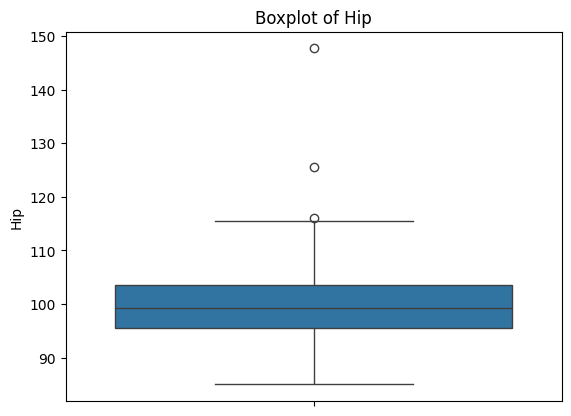

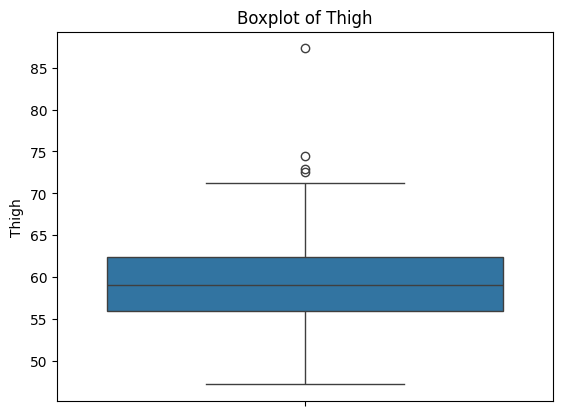

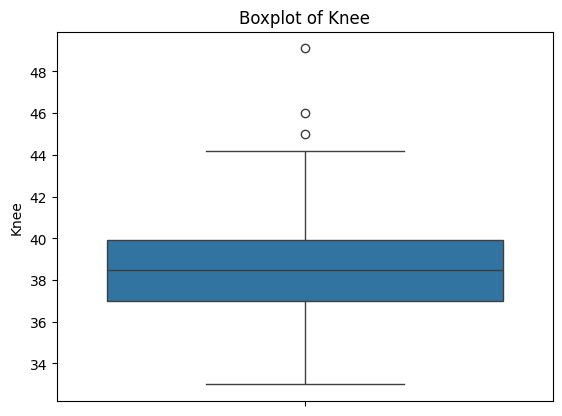

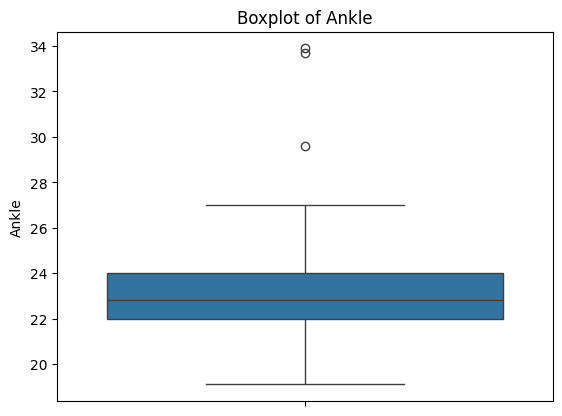

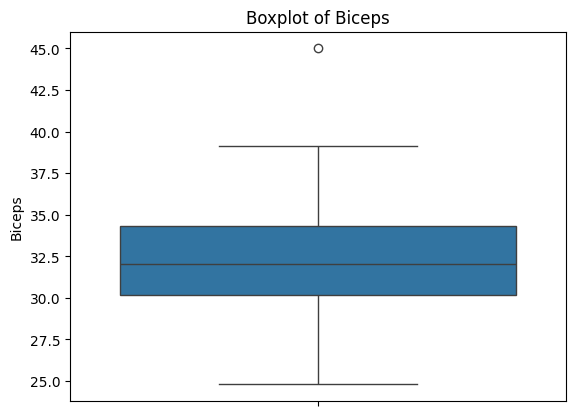

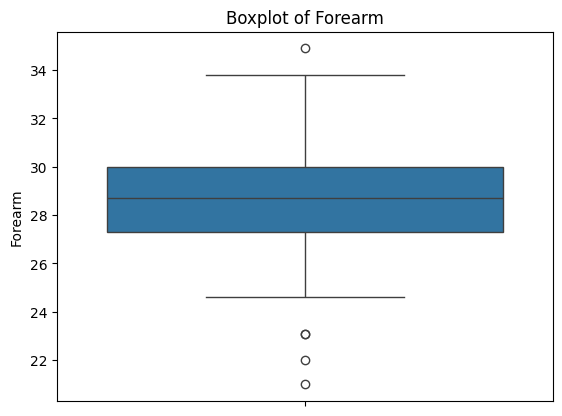

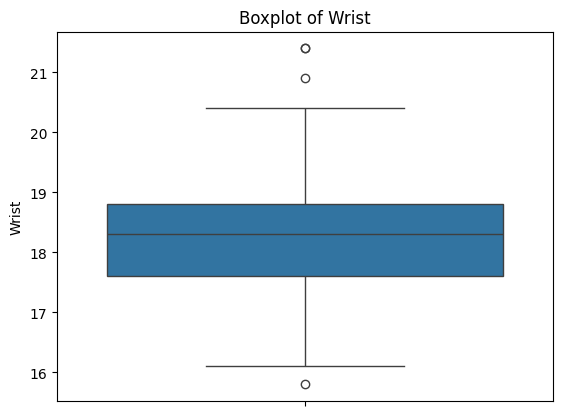

In [ ]:
# outliers in boxplot
for column in numeric_columns:
  sns.boxplot(data=df_copy,y=column)
  plt.title(f'Boxplot of {column}')
  plt.ylabel(column)
  plt.show()

In [ ]:
df_copy1=df.copy()

**Outliers Handling**

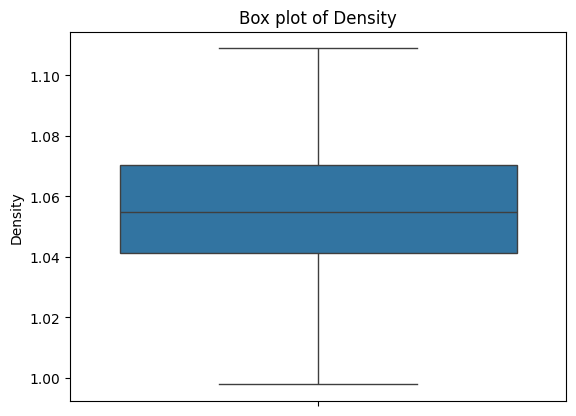

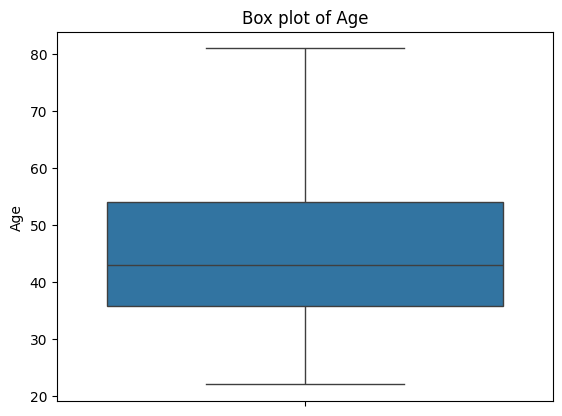

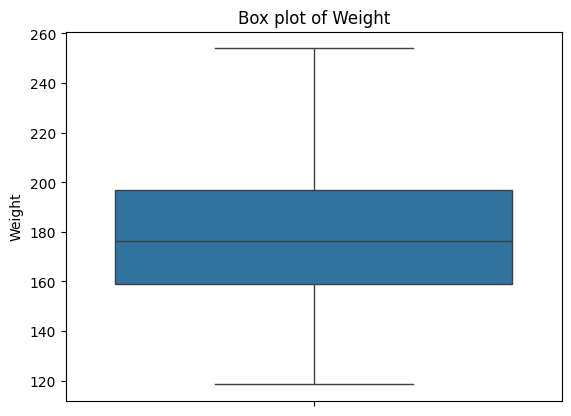

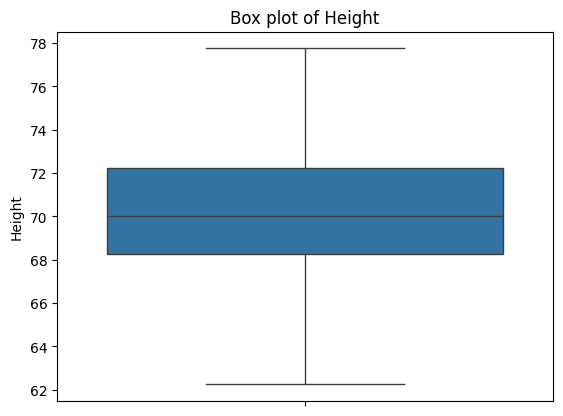

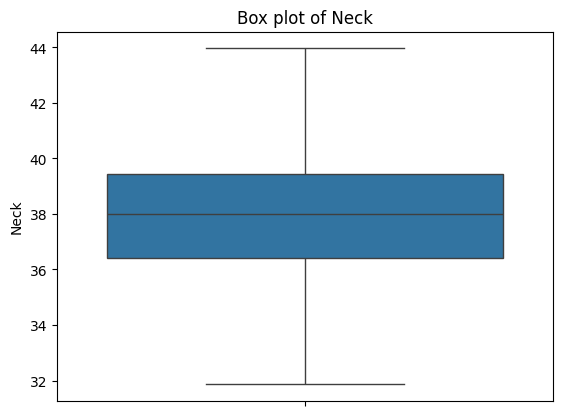

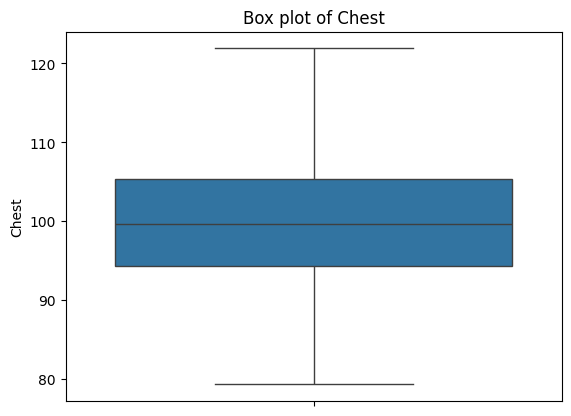

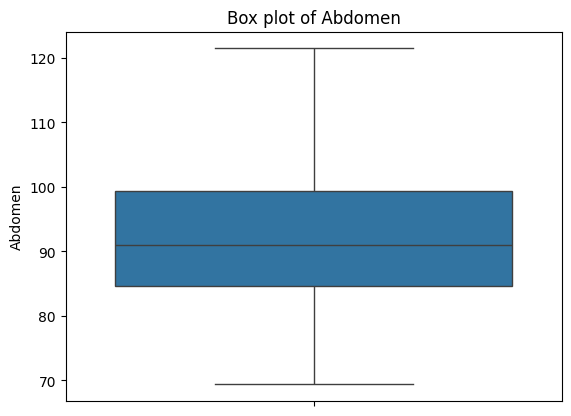

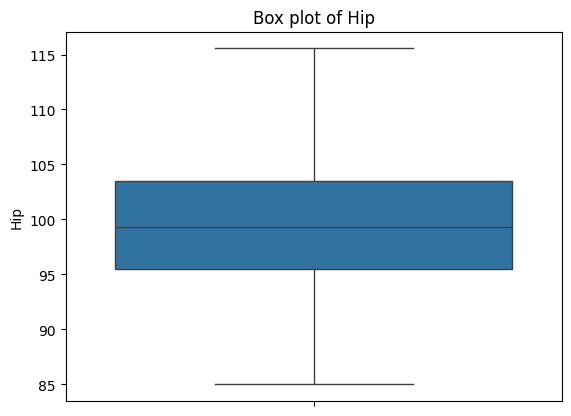

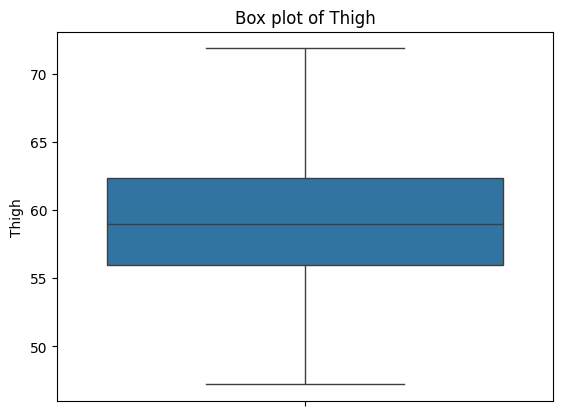

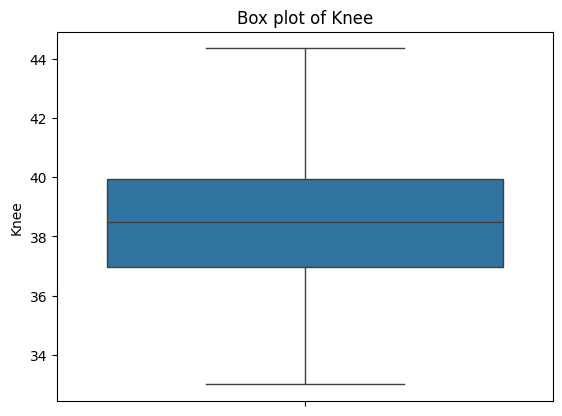

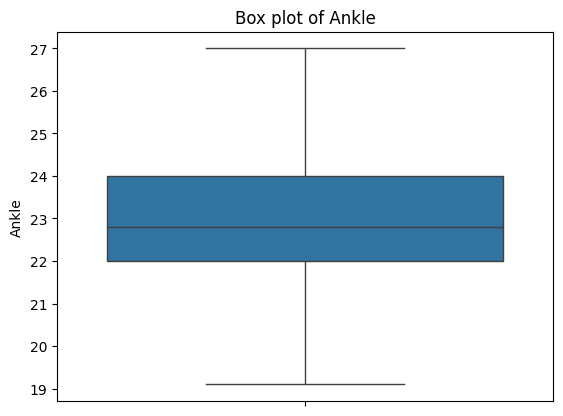

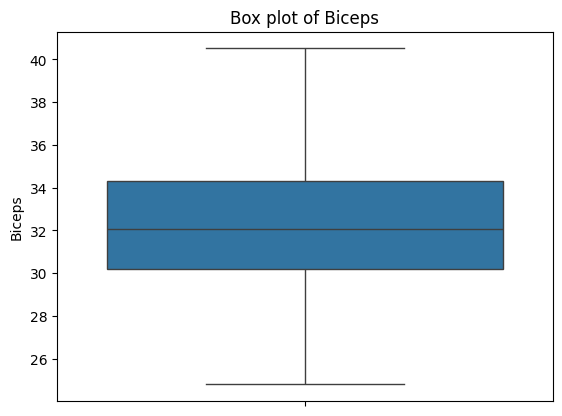

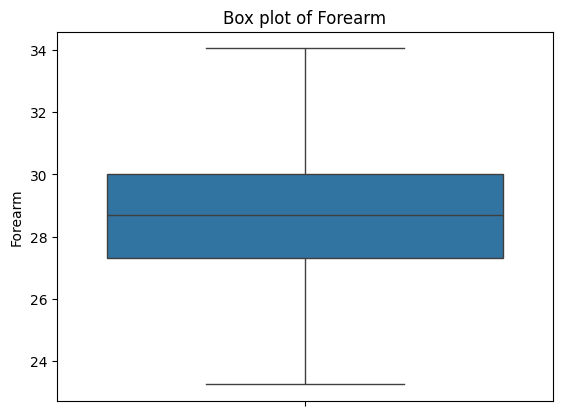

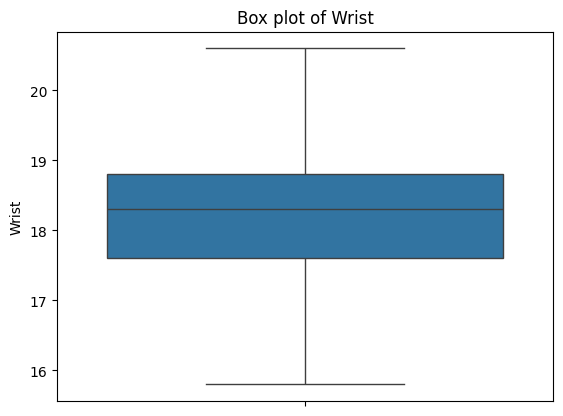

In [ ]:
#IQR method for to handling outliers
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

outlier_Limit = {}  # Dictionary to store IQR-related stats

for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Store the limits for reference
    outlier_Limit[column] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Limit': lower_limit,
        'Upper Limit': upper_limit
    }

    # Cap the outliers (Winsorization)
    df[column] = np.where(df[column] < lower_limit, lower_limit,
                          np.where(df[column] > upper_limit, upper_limit, df[column]))


for column in numeric_columns:
   sns.boxplot(data=df,y=column)
   plt.title(f'Box plot of {column}')
   plt.show()




# Classification(encoder)

In [ ]:
x=df_copy.drop('Category',axis=1)
y=df_copy['Category']

In [ ]:
le=LabelEncoder()                   ##tool from scikit-learn used to convert categorical labels into numerical values.
df_copy1['Category']=le.fit_transform(df_copy1['Category'])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)
print(y_test)
print(y_pred)

165         Average
6           Average
111             Fat
172    Slightly Fat
115         Average
183            Lean
199    Slightly Fat
235         Average
9              Lean
30             Lean
60              Fat
218    Slightly Fat
226         Average
159    Slightly Fat
68             Lean
148        Muscular
196    Slightly Fat
15     Slightly Fat
101    Slightly Fat
24             Lean
86          Average
19          Average
117            Lean
124            Lean
33     Slightly Fat
242           Obese
186    Slightly Fat
219         Average
10             Lean
162            Lean
140    Slightly Fat
96             Lean
125         Average
82          Average
213         Average
25         Muscular
109    Slightly Fat
18          Average
205         Average
182            Lean
67             Lean
132    Slightly Fat
156           Obese
143            Lean
45             Lean
178    Slightly Fat
16              Fat
66     Slightly Fat
142    Slightly Fat
175            Lean


In [ ]:
#Evaluating the model
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)                    #an accuracy of 0.48 means that for every 100 predictions made,
                                                #the model was correct approximately 48 times and incorrect approximately 52 times.

Accuracy: 0.4117647058823529


# Confusion Matrix

In [ ]:
class_names = ['Underweight', 'Normal', 'Overweight', 'Obese']  # Manually set if needed
class_names = le.classes_             # If used LabelEncode

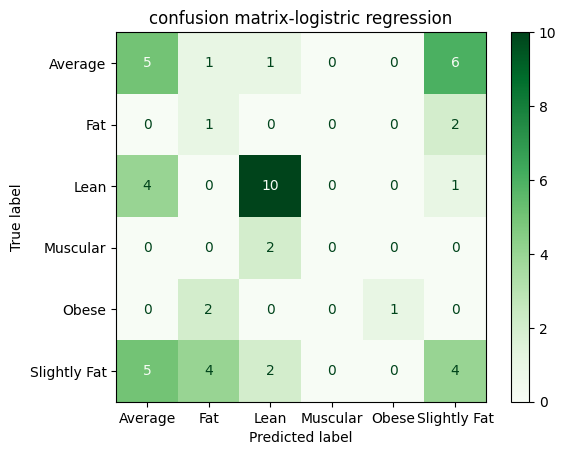

In [ ]:
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le.classes_)
disp.plot(cmap='Greens')
plt.title("confusion matrix-logistric regression")
plt.show()

Diffrent model
models =Logistic Regression,K-Nearest Neighbors,
    Decision Tree Classifier,
    Random Forest Classifier,
    Support Vector Machine Classifier(SVC)

In [ ]:
models_names = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Support Vector Machine Classifier": SVC()
}

In [ ]:
outputs = []
     ##Creating a list that will hold cross-validation scores of all models

In [ ]:
#K-Fold Cross Validation is a model evaluation technique that helps us get a more reliable estimate of
#model performance by splitting the dataset into K parts (called "folds").
#Creating a KFold object   #Fold 1,	Train Set 2 3 4 5 ,	Test Set	Fold 1
kfold=KFold(n_splits=7,shuffle=True,random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Models: ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree Classifier', 'Random Forest Classifier', 'Support Vector Machine Classifier']
Number of outputs: 5


<ipython-input-59-321742892>:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(outputs, labels=model_names)


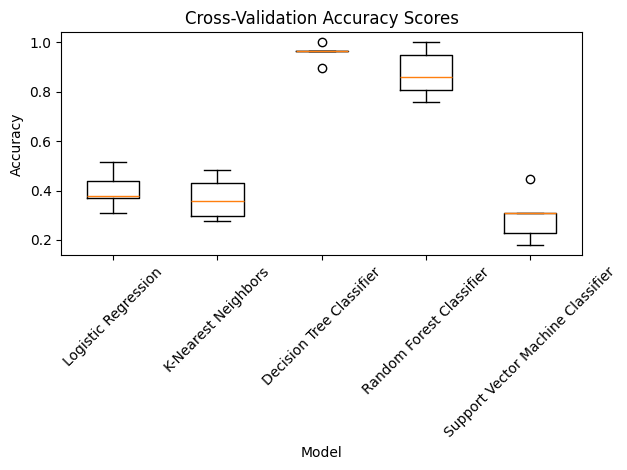

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

outputs = []        # to store cv scores
model_names = []    # to store model names (this fixes your error)

# Loop through models
for model_name, model in models.items():
    try:
        cv_scores = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
        outputs.append(cv_scores)
        model_names.append(model_name)
    except Exception as e:
        print(f"Error with model {model_name}: {e}")

# Check that lengths match
print("Models:", model_names)
print("Number of outputs:", len(outputs))

# Plot only if data is valid
if len(model_names) == len(outputs):
    plt.boxplot(outputs, labels=model_names)
    plt.title("Cross-Validation Accuracy Scores")
    plt.xlabel("Model")
    plt.ylabel("Accuracy")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Mismatch in number of models and output score lists.")

In [ ]:
test_mse={}
for name,model in models.items():
  model.fit(x_train,y_train)     ## Fit the model to the training data
  y_pred=model.predict(x_test)    #  # Make predictions on the test set

  test_accuracy=accuracy_score(y_test,y_pred)    ## Calculate the test accuracy
  test_mse[name] = test_accuracy                 # Store the test accuracy in the dictionary
  print(f"{name} test accuracy: {test_accuracy}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression test accuracy: 0.4117647058823529
K-Nearest Neighbors test accuracy: 0.39215686274509803
Decision Tree Classifier test accuracy: 0.9411764705882353
Random Forest Classifier test accuracy: 0.9215686274509803
Support Vector Machine Classifier test accuracy: 0.3333333333333333


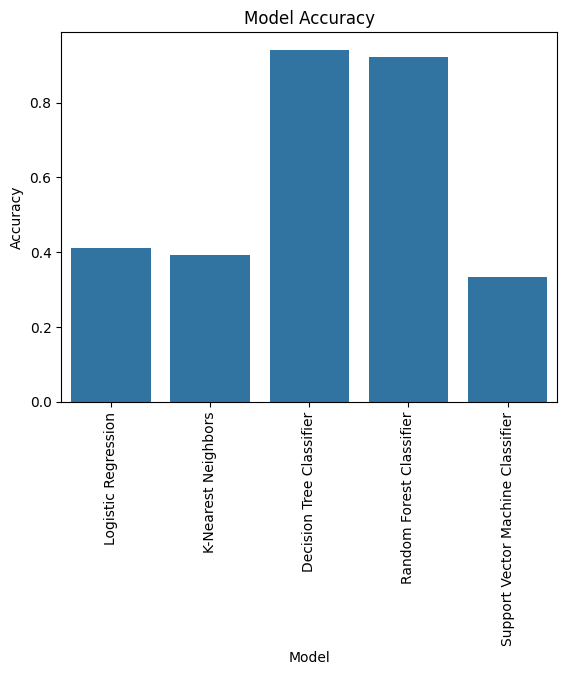

In [ ]:
#bar graph to show mse of all models
sns.barplot(x=list(models.keys()),y=test_mse.values())
plt.title("Model Accuracy")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#create the decision tree Classifier model
baseline_model=DecisionTreeClassifier()

 #fit the model in training data
baseline_model.fit(x_train, y_train)
#make the prediction on the test set
y_pred=baseline_model.predict(x_test)


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder


# Calculating Evaluation Metrics
accuracy = accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Evaluation Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")n
print(f"F1-score (weighted): {f1:.4f}")
print("\n"+"="*30+"\n")
print(f"Model is {accuracy*100:.4f}% accurate.")
print("\n"+"="*30)
print(classification_report(y_test, y_pred))

Accuracy: 0.9412
Precision (weighted): 0.9529
Recall (weighted): 0.9412
F1-score (weighted): 0.9413


Model is 94.1176% accurate.

              precision    recall  f1-score   support

     Average       0.87      1.00      0.93        13
         Fat       1.00      1.00      1.00         3
        Lean       1.00      0.80      0.89        15
    Muscular       0.67      1.00      0.80         2
       Obese       1.00      1.00      1.00         3
Slightly Fat       1.00      1.00      1.00        15

    accuracy                           0.94        51
   macro avg       0.92      0.97      0.94        51
weighted avg       0.95      0.94      0.94        51



Excellent Performance for 'Fat', 'Obese', and 'Slightly Fat' Categories:
Strong Performance for 'Average' and 'Lean' Categories
Area for Potential Improvement: 'Muscular' Category:
Overall Robustness: